In [7]:
import numpy as np

In [1]:
from ClassifierMetric.utils.plots import plot_class_score
from ClassifierMetric.datamodules.jetnet.datasets import JetNetDataset
from ClassifierMetric.datamodules.jetnet.dataloaders import JetNetDataLoader
from ClassifierMetric.utils.trainer import ModelClassifierTest
from ClassifierMetric.models.particlenet import ParticleNet
from ClassifierMetric.configs.particlenet_config import ParticleNetConfig

In [2]:
workdir = '/home/df630/ClassifierMetric/results/tops.ParticleNet__2'
config = ParticleNetConfig.load(path=workdir + '/configs.json')
config.workdir = workdir

#=================================================================================
INFO: created directory: /home/df630/ClassifierMetric/results/tops.ParticleNet__4
#=================================================================================


In [3]:
model = ParticleNet(model_config=config)
datasets = JetNetDataset(dir_path = '/home/df630/ClassifierMetric/data/', 
                        datasets = config.datasets,
                        class_labels = config.labels,
                        num_jets = config.num_jets,
                        num_constituents = config.num_constituents,
                        preprocess = config.preprocess,
                        particle_features = config.features,
                        remove_negative_pt = True
                        ) 
dataloader = JetNetDataLoader(datasets=datasets, data_split_fracs=config.data_split_fracs, batch_size=config.batch_size)
classifier = ModelClassifierTest(classifier = model, 
                                dataloader = dataloader,
                                epochs = config.epochs, 
                                lr = config.lr, 
                                early_stopping = config.early_stopping,
                                warmup_epochs = config.warmup_epochs,
                                workdir = config.workdir,
                                seed = config.seed)

INFO: loading and preprocessing data...
	- test : jetnet150  [t150.hdf5, particle_features]  shape: torch.Size([177945, 150, 6])
	- model 0: flow_midpoint  [fm_tops150_cond_mp200nfe.h5, etaphipt]  shape: torch.Size([266920, 150, 6])
	- model 1: diff_midpoint  [midpoint_100_csts.h5, etaphipt_frac]  shape: torch.Size([266920, 150, 6])
	- model 2: flow_euler  [fm_tops150_cond_eu200nfe.h5, etaphipt]  shape: torch.Size([266920, 150, 6])
	- model 3: diff_euler  [euler_200_csts.h5, etaphipt_frac]  shape: torch.Size([266920, 150, 6])
INFO: building dataloaders...
INFO: train/val/test split ratios: 0.6/0.1/0.3
INFO: train size: 640608, validation size: 106768, testing sizes: 373688


In [4]:
classifier.load_model(path=config.workdir + '/best_model.pth')
classifier.test(class_labels=config.labels)

testing:   0%|          | 0/365 [00:00<?, ?it/s]

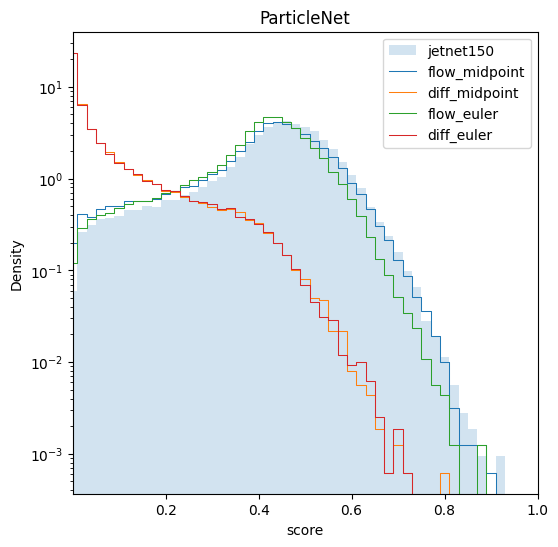

In [11]:
plot_class_score(predictions=classifier.predictions,
                class_labels=config.labels,
                reference='flow_midpoint',
                title=config.model_name,
                figsize=(6,6), 
                xlim=(1e-5,1),
                bins=np.arange(-0.03, 1.03, 0.02),
                workdir=config.workdir,
                density=True,
                legend_loc='upper right')

In [14]:
print(classifier.log_posterior[0])

tensor([-1.0107, -3.6789, -1.0726, -3.7686])
